In [1]:
import numpy as np

In [2]:
import os

In [3]:
import ntpath

In [4]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col

In [5]:
from matplotlib.ticker import FormatStrFormatter

In [6]:
from power_spec import power_spec as ps

In [7]:
from cpw_resonator import cpw_resonator as cpw

In [8]:
from qkit.analysis import dat_reader as dat

In [9]:
from qkit.analysis.resonator import Resonator as Resonator

In [10]:
from qkit.analysis.circle_fit.circuit import reflection_singleport as rf_p

In [11]:
from qkit.storage import hdf_lib

In [12]:
from tvregdiff import TVRegDiff as tv

In [13]:
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage.filters import median_filter

In [14]:
import random

In [15]:
font = {'weight' : 'normal', 'size' : 20}
plt.rc('font', **font)
labelsize=25

In [16]:
%matplotlib inline

In [17]:
startcolor        =   'black'
midcolor          =   'blue'
endcolor          =   'white'

In [18]:
c_cmap = col.LinearSegmentedColormap.from_list('olive',[startcolor,midcolor,endcolor], N = 256, gamma = 1.0)
cm.register_cmap(cmap = c_cmap)

In [19]:
import scipy.special as ss
import scipy.constants as sc


phi_0 = sc.physical_constants['magn. flux quantum'][0]
c = sc.physical_constants['speed of light in vacuum'][0]   
h = sc.h
hbar = sc.h/(2*np.pi)
e = sc.e 
R_k = h/e**2

In [20]:
w = 10e-6
g = 6.0e-6
l = (2710+50+65)*10**(-6)
Cc = 5.0e-15
res = cpw(w,g,l,Cc)

In [21]:
res._fresc

10335994432.967741

In [22]:
res.get_values()

Ll = 4.38459342705e-07 H/m
Cl = 1.63650727064e-10 F/m
distributed:
L = 1.23864764314e-09 H
C = 4.62313303957e-13 F
R = 0.236314491642 Ohm
lumped element:
Lr = 1.00400996255e-09 H
Cr = 2.31156651979e-13 F
Rr = 14979288.7616 Ohm

Q_int = 117647.058824 
Q_ext = 2909.8627142 
Q_load = 2839.62783338 

f_res = 10447152222.1 GHz
f_resc = 10335994433.0 GHz 


In [105]:
w1 = np.linspace(1.0e-6,25e-6,100)

In [106]:
g1 = np.linspace(1.0e-6,15e-6,100)

In [107]:
X,Y = np.meshgrid(w1,g1)

In [108]:
C = []
for i in g1:
    C.append(res.conformal(w1,i)[1]*10**12)

In [109]:
L = []
for i in g1:
    L.append(res.conformal(w1,i)[2]*10**9)

In [110]:
LC = []
for i in g1:
    LC.append(res.conformal(w1,i)[2]*res.conformal(w1,i)[1]*10**21)

In [111]:
eff = []
for i in g1:
    eff.append(res.conformal(w1,i)[0]-res.conformal(w,g)[0])

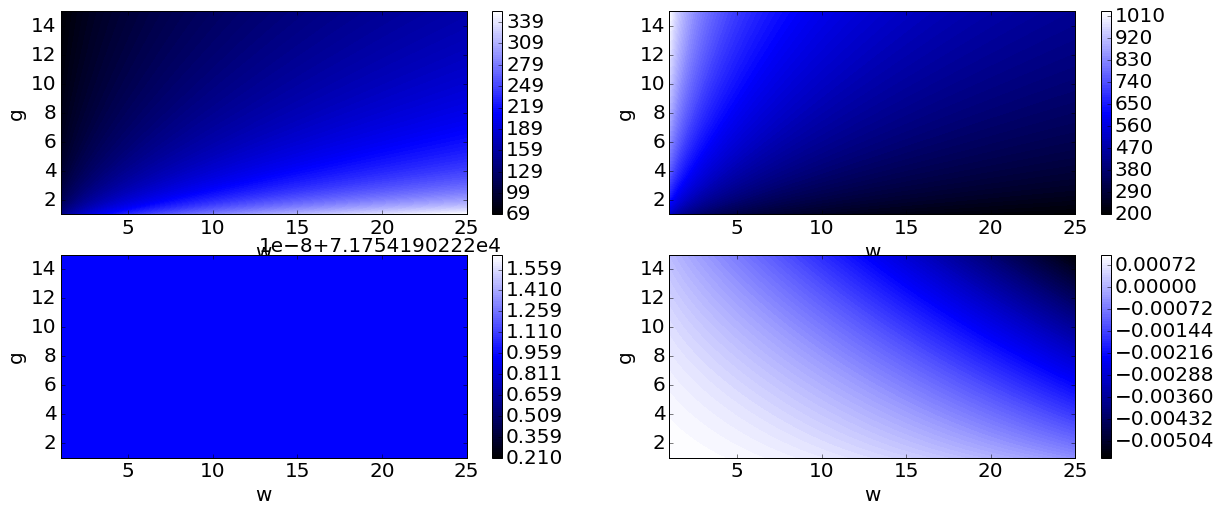

In [112]:
fig1 = plt.figure(figsize = (20,8))
sub1 = fig1.add_subplot(221)
cb1 = sub1.contourf(X*10**6,Y*10**6, C, 100, cmap=c_cmap)
cbar1 = plt.colorbar(cb1)
sub1.set_xlabel('w')
sub1.set_ylabel('g')
#sub1.colorbar(sub1)
sub2 = fig1.add_subplot(222)
cb2 = sub2.contourf(X*10**6,Y*10**6, L, 100, cmap=c_cmap)
cbar2 = plt.colorbar(cb2)
sub2.set_xlabel('w')
sub2.set_ylabel('g')
sub3 = fig1.add_subplot(223)
cb3 = sub3.contourf(X*10**6,Y*10**6, LC, 100, cmap=c_cmap)
cbar1 = plt.colorbar(cb3)
sub3.set_xlabel('w')
sub3.set_ylabel('g')
sub4 = fig1.add_subplot(224)
cb4 = sub4.contourf(X*10**6,Y*10**6, eff, 100, cmap=c_cmap)
cbar4 = plt.colorbar(cb4)
sub4.set_xlabel('w')
sub4.set_ylabel('g')

In [113]:
Ic = 6e-6

In [114]:
res.set_Ic = Ic

In [115]:
LJ = 3.*res.L_SQUID_sym(Ic,0)
print LJ

8.22764939241e-11


In [116]:
LJ/res._L

0.066424454427817345

In [117]:
res.fres_Wallraff(Ic,Ic,0, 3)

9698526918.8483849

In [118]:
res._Qext

2909.8627141974735

In [119]:
res._Qload

2839.6278333837085

In [120]:
res._Cr

2.3115665197852225e-13

In [121]:
Cc_real = 1/np.sqrt(1253*8.8415e9*50*2*np.pi/(res._Cr))

In [122]:
print Cc_real

8.14966487477e-15


In [123]:
res._C_star

4.998653864851023e-15

In [124]:
res.Q_ext(2.*np.pi*8.86*10**9, 7.5e-15, own = False)

1524.9536641529653

In [125]:
res.fres_Wallraff(Ic, Ic, 0, 3)

9698526918.8483849

In [126]:
flux = np.linspace(-1.0,1.0, 1000)

In [127]:
Ic1 = 1e-6

([<matplotlib.axis.YTick at 0xc84d090>,
 <a list of 4 Text yticklabel objects>)

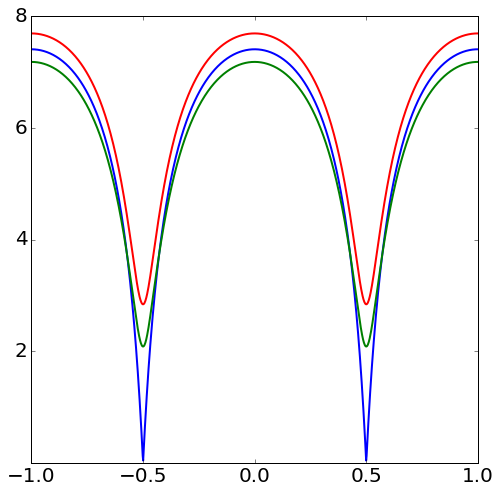

In [128]:
fig1 = plt.figure(figsize=(8,8))
plt.plot(flux, res.fres_Wallraff(Ic1, Ic1, flux, 3)/10**9., lw = 2.)
plt.plot(flux, res.fres_Wallraff(Ic1, 0.8*Ic1, flux, 3)/10**9., lw = 2.)
plt.plot(flux, res.fres_Wallraff(Ic1, 1.3*Ic1, flux, 3)/10.**9., lw = 2.)
plt.yticks([2,4,6,8])

In [129]:
fig1.savefig('eichler_res.pdf', dpi = 400, bbox_inches = 'tight')

(-0.1, 0.5)

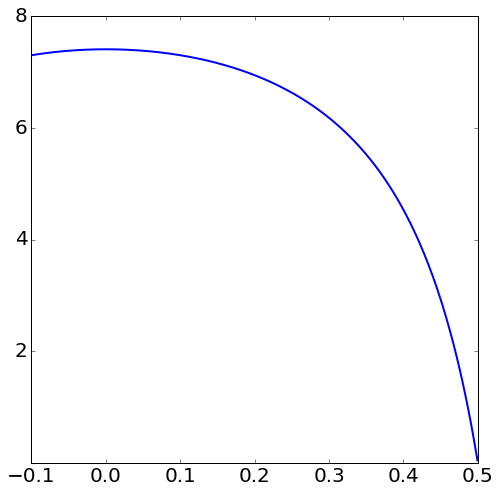

In [130]:
fig1 = plt.figure(figsize=(8,8))
plt.plot(flux, res.fres_Wallraff(Ic1, Ic1, flux, 3)/10**9., lw = 2.)
#plt.plot(flux, res.fres_Wallraff(Ic1, 0.8*Ic1, flux, 3)/10**9., lw = 2.)
#plt.plot(flux, res.fres_Wallraff(Ic1, 1.3*Ic1, flux, 3)/10.**9., lw = 2.)
plt.yticks([2,4,6,8])
plt.xlim(-0.1,0.5)

In [134]:
IC1 = np.linspace(0.5,7,100)
IC2 = np.linspace(0.5,7,100)

In [136]:
res.L_SQUID_asym?

In [166]:
gamma_0 = []
for i in IC2:
    gamma_0.append(res.L_SQUID_asym(IC1*10**-6, i*10**-6,0)/res._L)
    

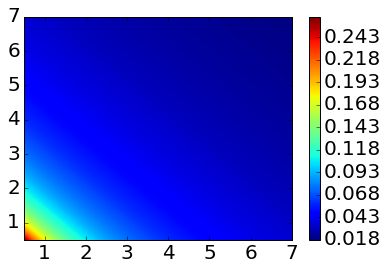

In [167]:
cb2 = plt.contourf(IC1, IC2, gamma_0, 300)
cbar2 = plt.colorbar(cb2)

In [175]:
np.array(gamma_0[-1][:]).shape

(100,)

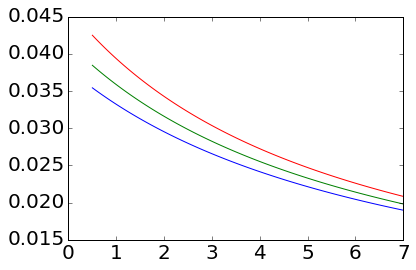

In [177]:
plt.plot(IC1, gamma_0[-1][:])
plt.plot(IC1, gamma_0[-10][:])
plt.plot(IC1, gamma_0[-20][:])

In [148]:
w = 10e-6
g = 6.0e-6
l = (2710+50+65)*10**(-6)
Cc = 7.5e-15
res2 = cpw(w,g,l,Cc)

In [149]:
res2.get_values()

Ll = 4.38459342705e-07 H/m
Cl = 1.63650727064e-10 F/m
distributed:
L = 1.23864764314e-09 H
C = 4.62313303957e-13 F
R = 0.236314491642 Ohm
lumped element:
Lr = 1.00400996255e-09 H
Cr = 2.31156651979e-13 F
Rr = 14979288.7616 Ohm

Q_int = 117647.058824 
Q_ext = 1314.2787108 
Q_load = 1299.75862751 

f_res = 10447152222.1 GHz
f_resc = 10281784120.0 GHz 
